In [ ]:
#importing packages
import pandas as pd
import numpy as np

In [ ]:
# Importing the dataset
train = pd.read_csv("NB Normal.csv")
train['Fault'] = 0 
test = pd.read_csv("IR - 7 Fault.csv")
test['Fault'] = 1

In [ ]:
len(train), len(test)

(121155, 121155)

In [ ]:
dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [ ]:
dataset = dataset.sample(frac=1, random_state=1)

In [ ]:
dataset

,DE,FE,Fault
511,0.699446,0.433715,1
105932,-0.039846,-0.001233,0
33078,0.099927,0.140736,0
8261,-0.023365,-0.010273,0
44259,0.012308,0.085264,0
...,...,...,...
107964,-0.188262,-0.254764,1
5192,0.006258,0.166213,0
87625,0.121664,-0.031435,1
108456,0.072446,-0.092044,1


In [ ]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2].values


In [ ]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
X

array([[ 0.69944567,  0.43371455],
       [-0.03984554, -0.00123273],
       [ 0.09992677,  0.14073636],
       ...,
       [ 0.12166391, -0.03143455],
       [ 0.07244607, -0.09204364],
       [-0.13774499, -0.18593636]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 1)

In [ ]:
X_test[0]

array([ 0.01648062, -0.03739273])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.15301389,  0.19477091],
       [ 0.05539038,  0.11176727],
       [ 0.12788123,  0.07704545],
       ...,
       [-0.08138   ,  0.02136727],
       [-0.09031393,  0.18162182],
       [-0.08852715, -0.02383273]])

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 6, max_depth=11,n_jobs=5,min_samples_leaf=3,verbose=True)
model.fit(X_train, y_train)


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   4 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   6 out of   6 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=11, min_samples_leaf=3, n_estimators=6,
                       n_jobs=5, verbose=True)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [110,120],
#     'max_features': [2,3],
#     'min_samples_leaf': [1,2],
#     'min_samples_split': [15,18],
#     'n_estimators': [95,100]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [ ]:
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 18,
 'n_estimators': 100}

In [ ]:
# Predicting the Test set results
y_pred = xgb_cl.predict(X_test)


In [ ]:
xgb_cl.score(X_test, y_test)


0.8756964219388387

In [ ]:
xgb_cl.score(X_train, y_train)

0.881344440710542

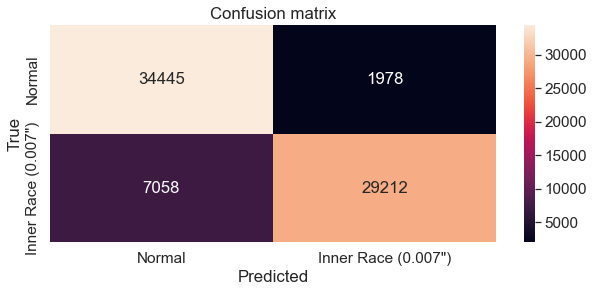

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
index = ['Normal','Inner Race (0.007")'] 
columns = ['Normal','Inner Race (0.007")'] 
cm_df = pd.DataFrame(cm,columns,index) 
plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.007")'
])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.83      0.95      0.88     36423
Inner Race (0.007")       0.94      0.81      0.87     36270

           accuracy                           0.88     72693
          macro avg       0.88      0.88      0.88     72693
       weighted avg       0.88      0.88      0.88     72693



In [ ]:
custom_input_DE = 0.15301389
custom_input_FE = 0.19477091

In [ ]:
import pickle

with open('Modify.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(xgb_cl, file)

In [ ]:
modelNew = pickle.load(open('Modify.pkl', 'rb'))

In [ ]:
result=modelNew.predict([[custom_input_DE, custom_input_FE]])

In [ ]:
result[0]

1

In [ ]:
y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)